1.a) The difference between graph and tree are many. The first notable one is that a graph can form a cycle, which is happening in this case and in trees this cannot happen. Another difference is that a graph does not have a a root node, contrary of a tree where there is a root node from which branches. This last one leads to another difference that is that in a tree a node can only have child nodes, where in a graph a node can have many edges, being able to be connected from another node, making it a vertex.

1.b) A graph consists of nodes/vertices and edges, and in the case, the meusres between the nodes. With this information gathered, we can implement a code for example to figure the closest path from one node to the other. If we think the other way, having only the information of the graph, a dictionary with the lenght of each edge connected to that node for exmple, we can through code as well plot a graph.

1.c) The visiualization gives us more information of the graph. If we simply build a graph over the mesures of the edges it can become something completely different, which deppending on what we are looking for can give us different results. When you look to a graph like in Fig. 1, you can imagine a map for example, being the nodes cities and the edges roads, but what changes then is the way we want to solve a problem in that graph. The result to figure the closest path from "A" to "S" for example, deppends on the algorithm we want to use, and then, the way the nodes are placed in the graph can change drastically in the result.

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

In [4]:
graph = {
    "A": {"B": 1, "C": 5, "H": 2},
    "B": {"A": 1, "C": 2, "D": 4},
    "C": {"A": 5, "B": 2, "G": 1},
    "D": {"B": 4, "E": 4, "F": 7, "L" : 7},
    "E": {"D": 4, "F": 3, "W": 6},
    "F": {"D": 7, "E": 3, "G": 2},
    "G": {"C": 1, "F": 2, "L": 3},
    "H": {"A": 2, "J": 9, "K": 5},
    "J": {"H": 9, "K": 3, "N": 6},
    "K": {"H": 5, "J": 3, "L": 5},
    "L": {"D": 7, "G": 3, "K": 5, "M": 4, "N": 3, "V": 10, "W": 8},
    "M": {"L": 4, "P": 2, "Q": 10},
    "N": {"J": 6, "L": 3, "P": 4, "S": 7},
    "P": {"M": 2, "N": 4, "R": 5},
    "Q": {"M": 10, "S": 8, "W": 4},
    "R": {"P": 5, "S": 4, "T": 3},
    "S": {"N": 7, "Q": 8, "R": 4, "T": 4, "U": 2, "V": 6},
    "T": {"R": 3, "S": 4, "U": 1},
    "U": {"S": 2, "T": 1, "V": 3},
    "V": {"L": 10, "S": 6, "U": 3, "W": 5},
    "W": {"E": 6, "L": 8, "Q": 4, "V": 5},
 }

xy = {
    'A': (48, -111),
    'B': (22, -203),
    'C': (151, -177),
    "D" : (37, -419),
    "E" : (190, -492),
    "F" : (183, -390),
    "G" : (166, -283),
    "H" : (125, -49),
    "J" : (395, -32),
    "K" : (223, -110),
    "L" : (382, -154),
    "M" : (524, -246),
    "N" : (539, -89),
    "P" : (666, -217),
    "Q" : (489, -396),
    "R" : (720, -392),
    "S" : (600, -501),
    "T" : (725, -550),
    "U" : (602, -642),
    "V" : (463, -580),
    "W" : (352, -495),
}

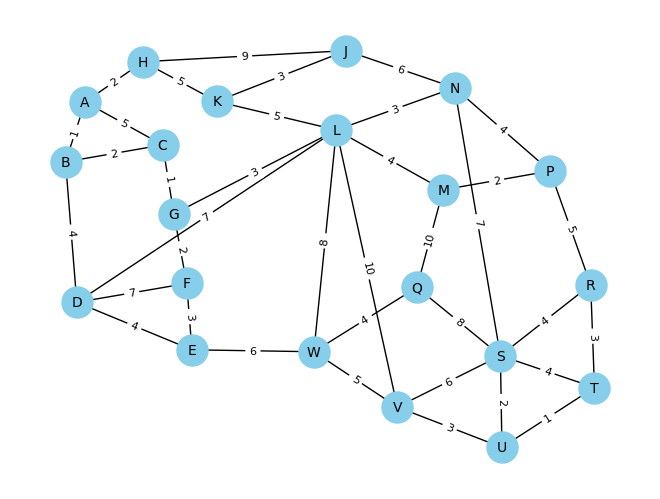

In [5]:
G = nx.Graph()

for node, neighbors in graph.items():
    G.add_node(node)
    for neighbor, weight in neighbors.items():
        G.add_edge(node, neighbor, weight=weight)

layout = {node: xy[node] for node in G.nodes()}

nx.draw(G, pos=layout, 
        with_labels=True, 
        node_size=500, 
        node_color="skyblue", 
        font_size=10, 
        font_color="black")

edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, 
                             pos=layout, 
                             edge_labels=edge_labels, 
                             font_size=8)

plt.axis("off")
plt.show()

In [126]:
#
# The code bellow was taken from David's class and modified
#

def calculate_distances(graph, starting_vertex, target_vertex):
    distances = {vertex: float("infinity") for vertex in graph}
    distances[starting_vertex] = 0
    
    paths = {vertex: [] for vertex in graph}

    pq = [(0, starting_vertex)]
    
    while len(pq) > 0:
        current_distance, current_vertex = heapq.heappop(pq)

        # Nodes can get added to the priority queue multiple times. We only
        # process a vertex the first time we remove it from the priority queue.
        if current_distance > distances[current_vertex]:
            continue
        
        edge_colors = ["red" if current_vertex in edge else "black" for edge in G.edges()]
        
        nx.draw(G, 
                layout, 
                with_labels=True, 
                node_size=500, 
                node_color="skyblue", 
                font_size=10, 
                font_color="black", 
                edge_color=edge_colors)
        
        edge_labels = nx.get_edge_attributes(G, "weight")
        nx.draw_networkx_edge_labels(G, 
                                     layout, 
                                     edge_labels=edge_labels, 
                                     font_size=8)
        
        plt.axis("off")
        print("Visiting vertex "+current_vertex)
        plt.show()
        
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # Only consider this new path if it`s better than any path we've
            # already found.
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))
                # adds current vertex on neighbor's path to keep track of path
                paths[neighbor] = paths[current_vertex] + [current_vertex]
            if neighbor == target_vertex:
                while len(pq) > 0:
                    heapq.heappop(pq)
                
                target_path = paths[target_vertex]
                target_path.append("S")
                
                plt.figure()

                edge_colors = []
                # checkcks each edge if the end of each edge belongs to the target path and then
                # paints in red, otherwise black
                for edge in G.edges():
                    if target_path:
                        for i in range(len(target_path) - 1):
                            if (edge[0] == target_path[i] and edge[1] == target_path[i + 1]) or (edge[1] == target_path[i] and edge[0] == target_path[i + 1]):
                                edge_colors.append("red")
                                break
                        else:
                            edge_colors.append("black")
                    else:
                        edge_colors.append("black")
                        
                print("Final graph with path from "+starting_vertex+" to "+target_vertex+" with a distance of "+str(distances[target_vertex]))
                
                nx.draw(G, 
                        layout, 
                        with_labels=True, 
                        node_size=500, 
                        node_color="skyblue", 
                        font_size=10, 
                        font_color="black", 
                        edge_color=edge_colors)
                
                red_edges = [edge for edge in G.edges() if target_path and (edge[0], edge[1]) in zip(target_path, target_path[1:])]
                edge_labels = nx.get_edge_attributes(G, "weight")
                nx.draw_networkx_edge_labels(G, layout, edge_labels=edge_labels, font_size=8)

                plt.axis("off")
                plt.show()
                
                break

Visiting vertex A


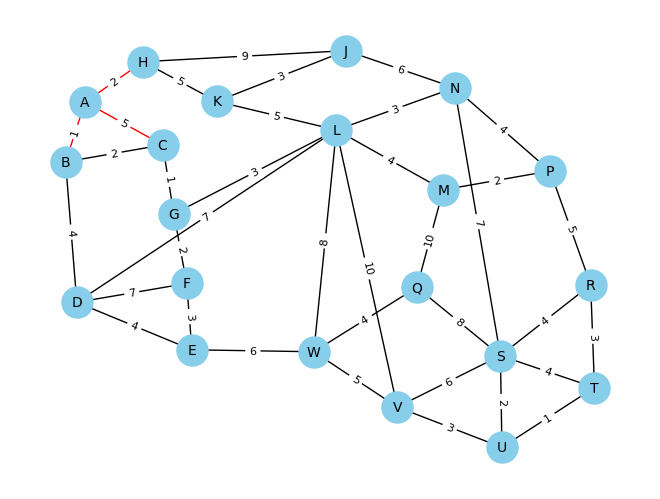

Visiting vertex B


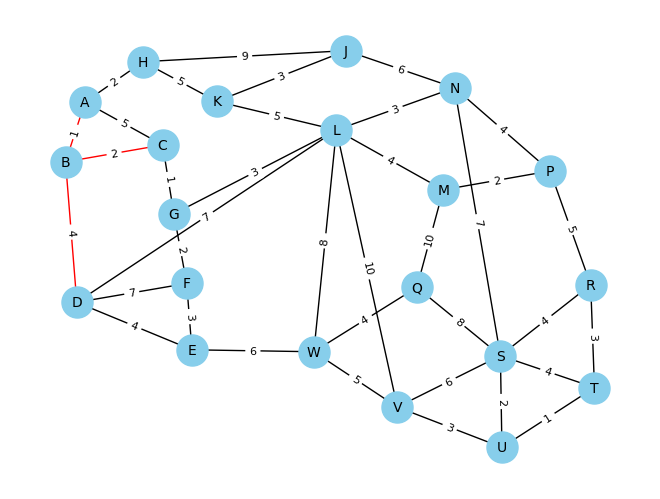

Visiting vertex H


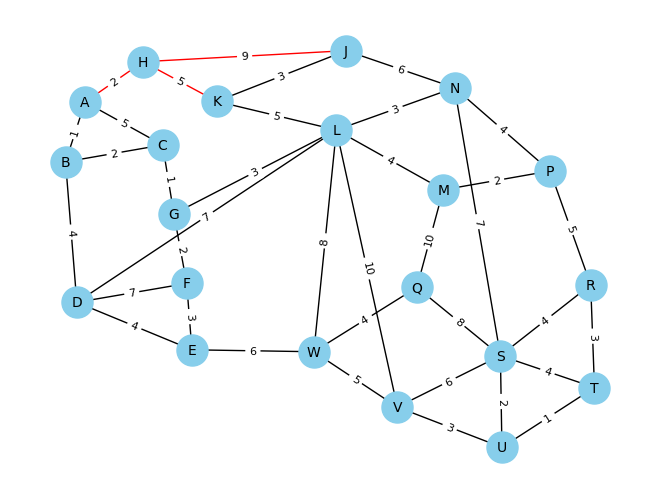

Visiting vertex C


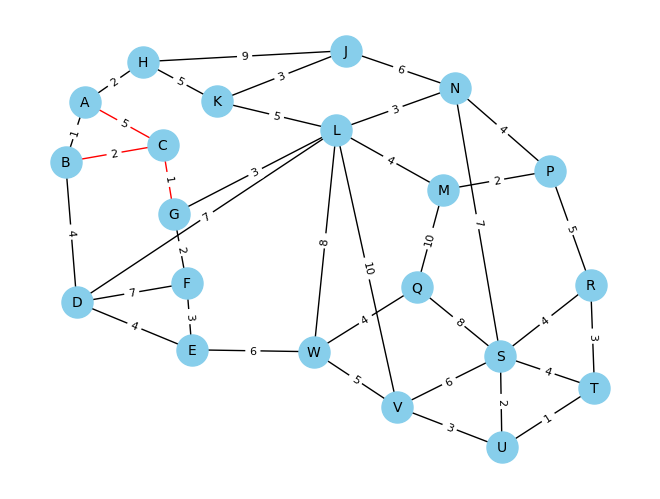

Visiting vertex G


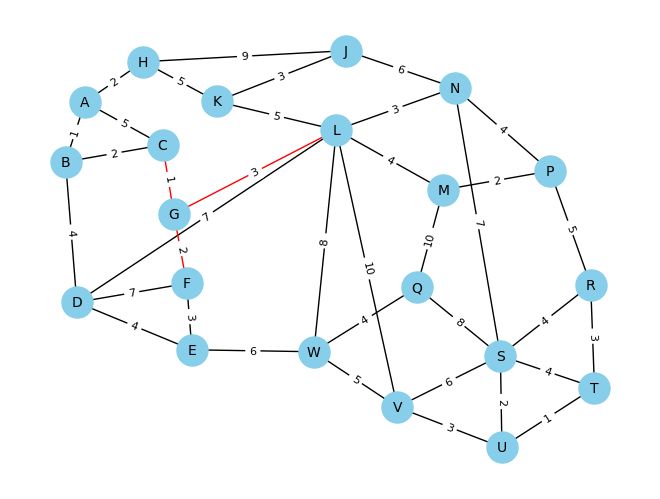

Visiting vertex D


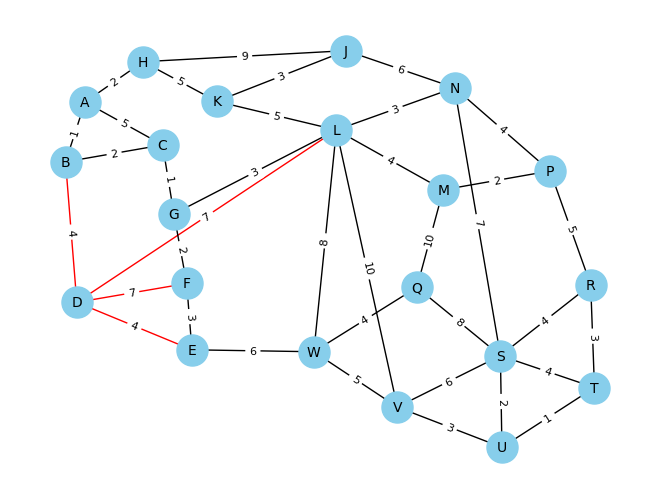

Visiting vertex F


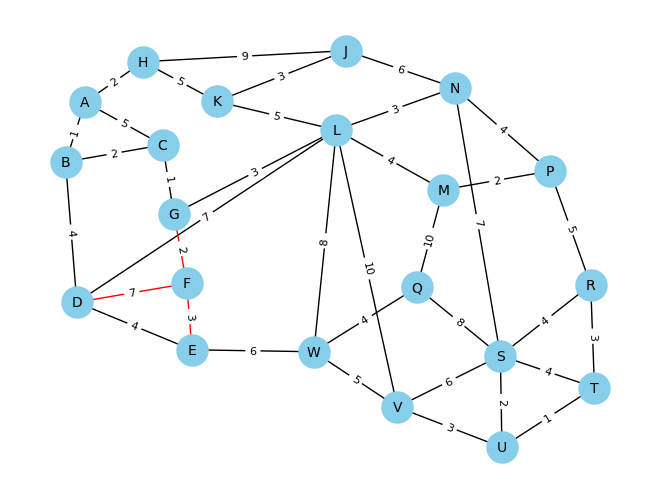

Visiting vertex K


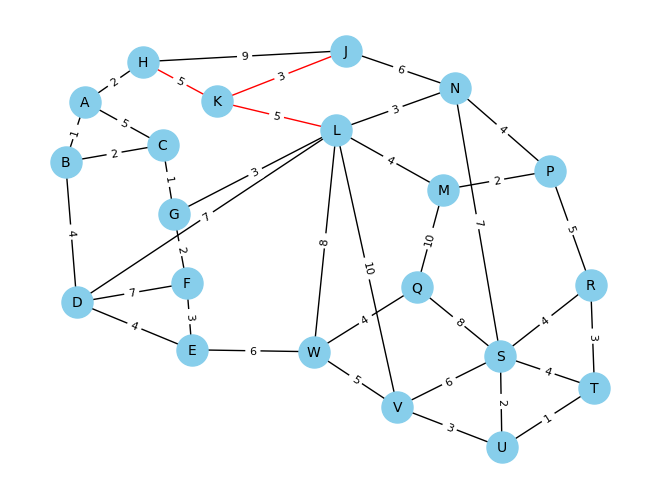

Visiting vertex L


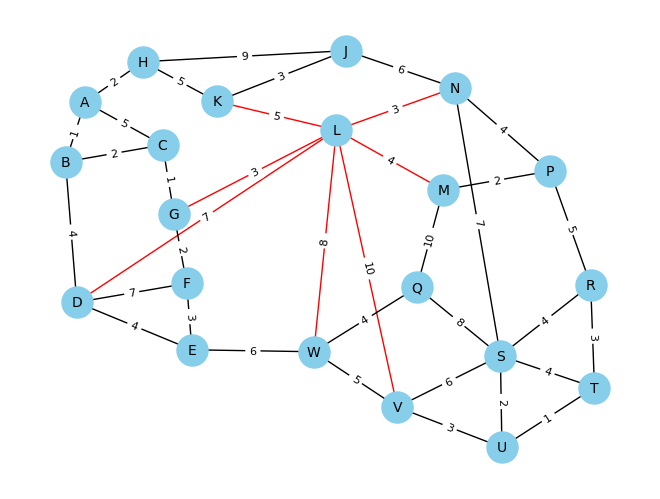

Visiting vertex E


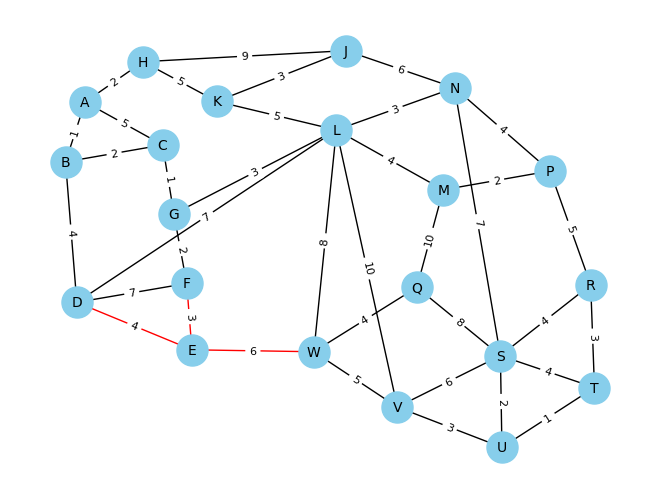

Visiting vertex J


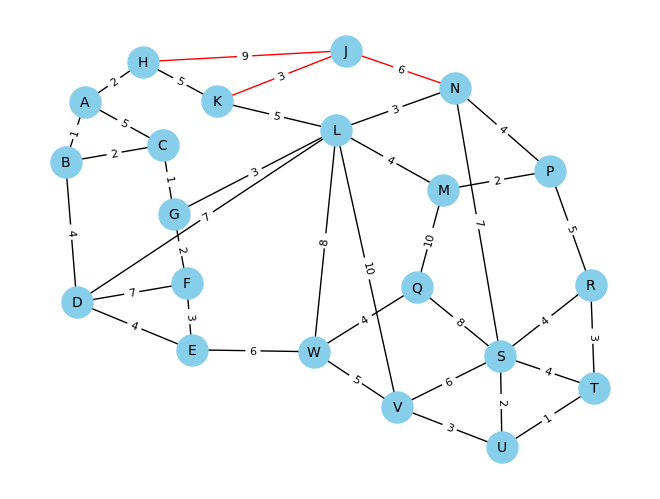

Visiting vertex N


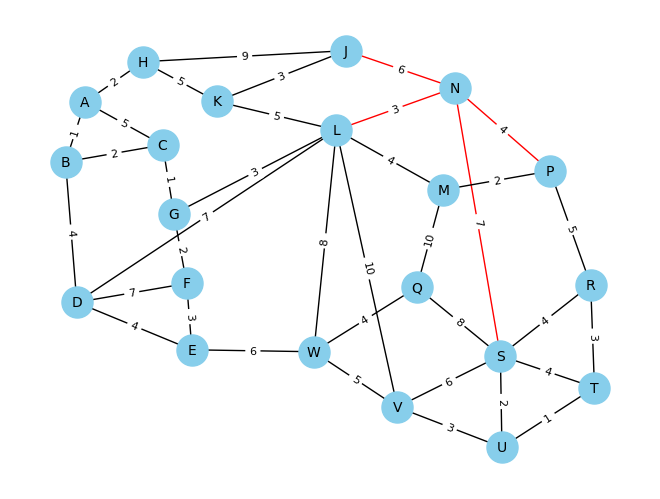

Final graph with path from A to S with a distance of 17


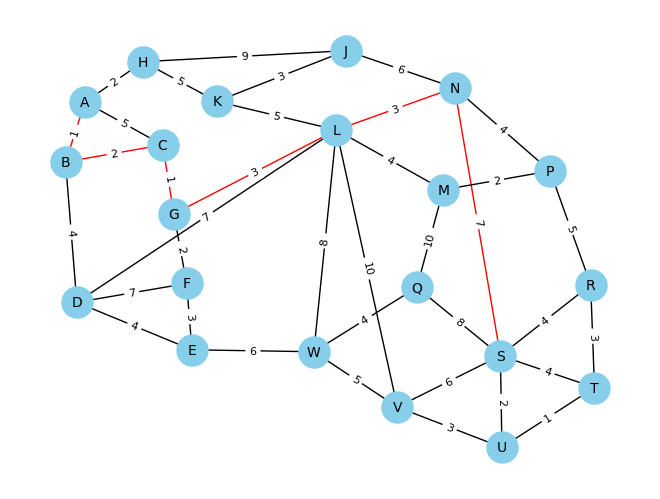

({'A': 0,
  'B': 1,
  'C': 3,
  'D': 5,
  'E': 9,
  'F': 6,
  'G': 4,
  'H': 2,
  'J': 10,
  'K': 7,
  'L': 7,
  'M': 11,
  'N': 10,
  'P': 14,
  'Q': inf,
  'R': inf,
  'S': 17,
  'T': inf,
  'U': inf,
  'V': 17,
  'W': 15},
 {'A': [],
  'B': ['A'],
  'C': ['A', 'B'],
  'D': ['A', 'B'],
  'E': ['A', 'B', 'D'],
  'F': ['A', 'B', 'C', 'G'],
  'G': ['A', 'B', 'C'],
  'H': ['A'],
  'J': ['A', 'H', 'K'],
  'K': ['A', 'H'],
  'L': ['A', 'B', 'C', 'G'],
  'M': ['A', 'B', 'C', 'G', 'L'],
  'N': ['A', 'B', 'C', 'G', 'L'],
  'P': ['A', 'B', 'C', 'G', 'L', 'N'],
  'Q': [],
  'R': [],
  'S': ['A', 'B', 'C', 'G', 'L', 'N', 'S'],
  'T': [],
  'U': [],
  'V': ['A', 'B', 'C', 'G', 'L'],
  'W': ['A', 'B', 'C', 'G', 'L']})

In [128]:
calculate_distances(graph, "A", "S")